In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

df = pd.read_csv('mvideo_features.csv')

df.head()

,product_id,name,brand,Гарантия,Гарантия предоставляется,Страна,Год релиза,Серия,Состояние,Внешний вид,...,Разрешение дополнительного экрана по вертикали (Пикс),Разрешение дополнительного экрана по горизонтали (Пикс),Складной смартфон,Встроенный искусственный интеллект,Проводная гарнитура,Micro-SIM,Гарантия на аксессуары (мес.),Гарантия на АКБ (мес.),Дополнительная комплектация,Сканер радужной оболочки глаза
0,30063534,Смартфон Apple iPhone 13 128GB nanoSim/eSim Mi...,Apple,1 год,продавцом,Китай,2021.0,iPhone 13,новый,новый,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,400410049,Смартфон HONOR X9c 12/256GB Titanium Black,HONOR,2 года,производителем,Китай,2025.0,X9c,новый,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,400307033,Смартфон HUAWEI Pura 70 Pro 12/512GB White,HUAWEI,1 год,производителем,Китай,2024.0,Pura 70 Pro,новый,новый,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30074449,Смартфон Apple iPhone 16 Pro 256GB Desert Tita...,Apple,1 год,продавцом,Китай,2024.0,iPhone 16 Pro,новый,новый,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,400257859,Смартфон POCO M6 Pro 12/512 Gb Black,POCO,1 год,производителем,Китай,2023.0,M6 Pro,новый,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


убираем Автофокус фронтальной камеры, гарантия делаем числовым признаком, как будто серию тоже стоит убрать, потому что там миллиард значений,ос оставила бы только андроид и айос потому что там тоже много значений(или лучше вообще убрать, потому что есть переменная бренда),  Поддержка стандартов (типо какие интернеты поддерживаются) тоже убрала бы, потому что они зависят сильно от года выпуска и как будто не такая важная переменная(либо рассматривать только 5G), цвет производителя тоже убираем потому что много нанов, количество фронтальных камер убираем, потому что там везде 1, кроме пары телефонов; у цифрового зума зависимость нелинейная, возможно стоит убрать перменную цифровой стабилизации, так как особо не влияет на цену,

In [2]:
df[['brand', 'Гарантия', 'Гарантия предоставляется', 'Страна','Состояние','Операционная система','Количество основных камер (шт)',
    'Основная камера МПикс','Съемка видео в портретном режиме','Цифровой зум (x)','Разрешение видеосъемки','Оптическая стабилизация',
    'Фронтальная камера МПикс','Материал корпуса','Цвет', 'Цифровая стабилизация','Оптический зум на увеличение (x)']]

,brand,Гарантия,Гарантия предоставляется,Страна,Состояние,Операционная система,Количество основных камер (шт),Основная камера МПикс,Съемка видео в портретном режиме,Цифровой зум (x),Разрешение видеосъемки,Оптическая стабилизация,Фронтальная камера МПикс,Материал корпуса,Цвет,Цифровая стабилизация,Оптический зум на увеличение (x)
0,Apple,1 год,продавцом,Китай,новый,iOS 15,2,12/12/0/0/0,Да,5.0,3840x2160 Пикс (4K),Да,12/0,алюминий/ стекло,темная ночь,NaN,NaN
1,HONOR,2 года,производителем,Китай,новый,Android Magic OS 8.0,2,108/5,NaN,NaN,3840x2160 Пикс (4K),Да,16,пластик ударопрочный,черный,Да,NaN
2,HUAWEI,1 год,производителем,Китай,новый,Android EMUI 14.2,3,50/48/12.5,NaN,100.0,3840x2160 Пикс (4K),Да,13,металл/ стекло,белый,NaN,3.5
3,Apple,1 год,продавцом,Китай,новый,iOS 18,3,48/48/12,Да,25.0,3840x2160 Пикс (4K),Да,12,титан/ стекло,титановый/ золотистый,NaN,5.0
4,POCO,1 год,производителем,Китай,новый,Android 13,3,64/8/2,NaN,NaN,1920x1080 Пикс,Да,16,пластик/ стекло,черный,Да,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Xiaomi,1 год,производителем,Китай,новый,Android Android 14,3,50/50/12,NaN,2.0,3840x2160 Пикс (4K),Да,12,пластик/ стекло,титановый/ синий,NaN,NaN
996,Apple,1 год,производителем,Китай,новый,iOS 18,3,48/48/12,Да,25.0,3840x2160 Пикс (4K),Да,12,алюминий,титановый/ золотистый,Да,5.0
997,Apple,1 год,производителем,Китай,новый,iOS 18,3,48/48/12,Да,25.0,3840x2160 Пикс (4K),Да,12,алюминий,титановый,Да,5.0
998,Apple,1 год,производителем,Китай,новый,iOS 18,3,48/48/12,Да,25.0,3840x2160 Пикс (4K),Да,12,алюминий,титановый/ черный,Да,5.0


In [3]:

df['brand'] = df['brand'].replace({'Redmi': 'Xiaomi'})

In [4]:
full_df = df.copy()

# Список столбцов, где нужно заменить NaN на 0
columns_to_fill = [
    'Гарантия', 
    'Количество основных камер (шт)', 
    'Цифровой зум (x)', 
    'Количество фронтальных камер (шт)', 
    'Фронтальная камера МПикс', 
    'Оптический зум на увеличение (x)'
]


full_df[columns_to_fill] = full_df[columns_to_fill].fillna(0)
full_df[['Съемка видео в портретном режиме', 'Оптическая стабилизация', 'Цифровая стабилизация']] = full_df[['Съемка видео в портретном режиме', 'Оптическая стабилизация', 'Цифровая стабилизация']].fillna("Нет")

In [5]:
# Преобразуем в список чисел
def parse_camera(s):
    mp_values = []
    for x in str(s).split('/'):
        if x.strip() == '0':
            continue
        try:
            # Пробуем преобразовать в число
            mp_values.append(float(x))
        except ValueError:
            # Если не число (например, "TOF"), пропускаем или добавляем 0
            continue
    return mp_values

full_df['camera_mp_parsed'] = full_df['Основная камера МПикс'].apply(parse_camera)
full_df['front_camera'] = full_df['Фронтальная камера МПикс'].apply(parse_camera)


# Создаем новые признаки
full_df['max_camera_mp'] = full_df['camera_mp_parsed'].apply(lambda x: max(x) if x else 0)
full_df['max_front_camera'] = full_df['front_camera'].apply(lambda x: max(x) if x else 0)
full_df['total_camera_mp'] = full_df['camera_mp_parsed'].apply(lambda x: sum(x) if x else 0)

full_df['camera_mp_parsed']

0            [12.0, 12.0]
1            [108.0, 5.0]
2      [50.0, 48.0, 12.5]
3      [48.0, 48.0, 12.0]
4        [64.0, 8.0, 2.0]
              ...        
995    [50.0, 50.0, 12.0]
996    [48.0, 48.0, 12.0]
997    [48.0, 48.0, 12.0]
998    [48.0, 48.0, 12.0]
999          [48.0, 12.0]
Name: camera_mp_parsed, Length: 1000, dtype: object

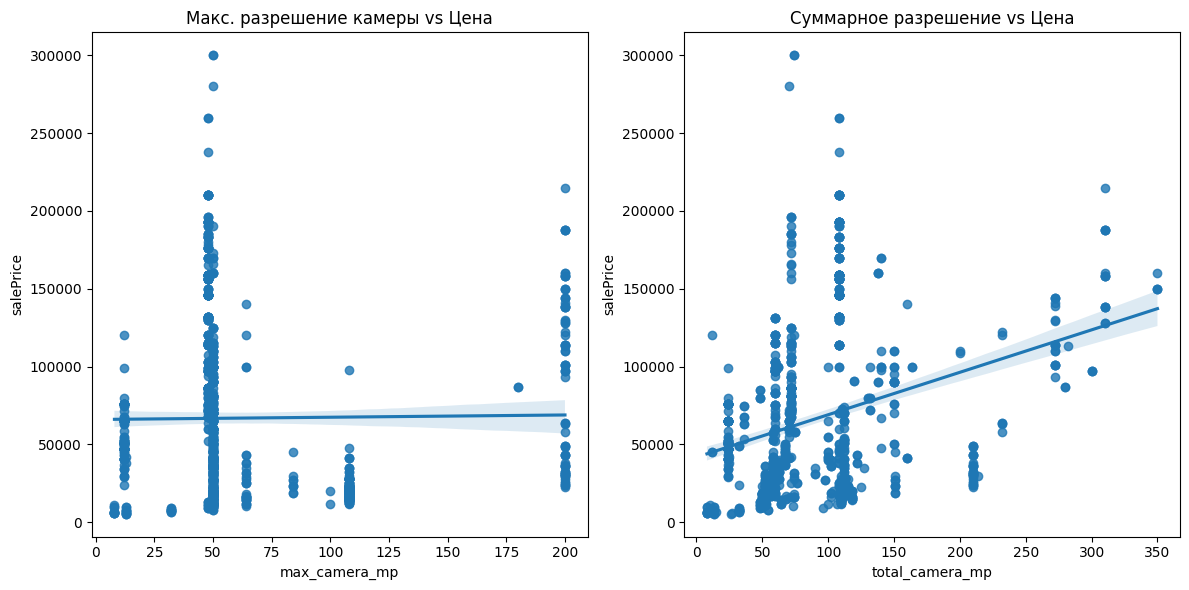

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График 1: Макс. разрешение vs Цена
sns.regplot(
    x='max_camera_mp', 
    y='salePrice', 
    data=full_df, 
    ax=axes[0]
)
axes[0].set_title('Макс. разрешение камеры vs Цена')

# График 2: Суммарное разрешение vs Цена
sns.regplot(
    x='total_camera_mp', 
    y='salePrice', 
    data=full_df, 
    ax=axes[1]
)
axes[1].set_title('Суммарное разрешение vs Цена')

plt.tight_layout()
plt.show()

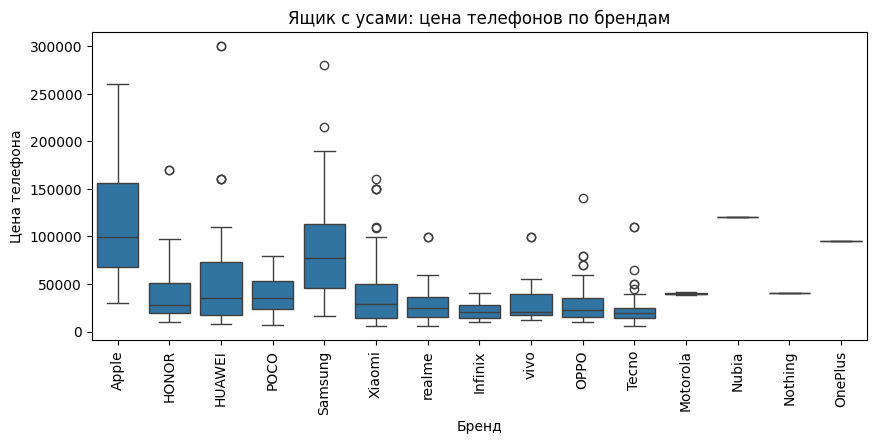

In [7]:
import seaborn as sns


plt.figure(figsize=(10, 4))
sns.boxplot(x='brand', y='salePrice', data=full_df)
plt.xlabel('Бренд')
plt.ylabel('Цена телефона')
plt.title('Ящик с усами: цена телефонов по брендам')
plt.xticks(rotation=90)
plt.show()

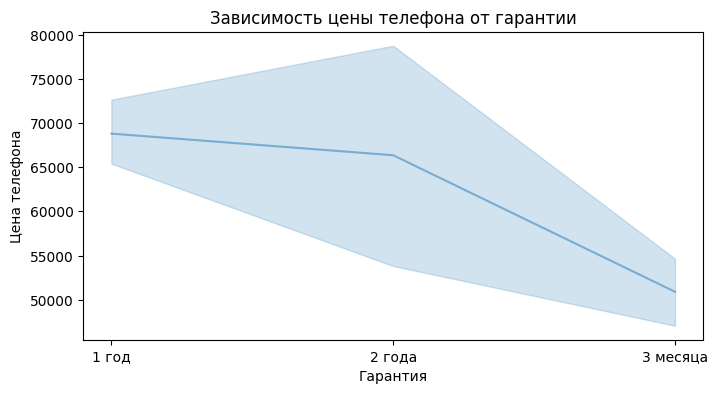

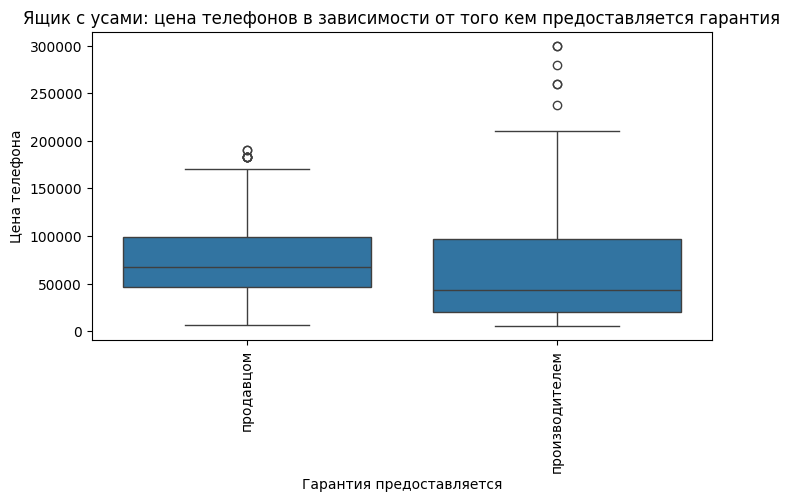

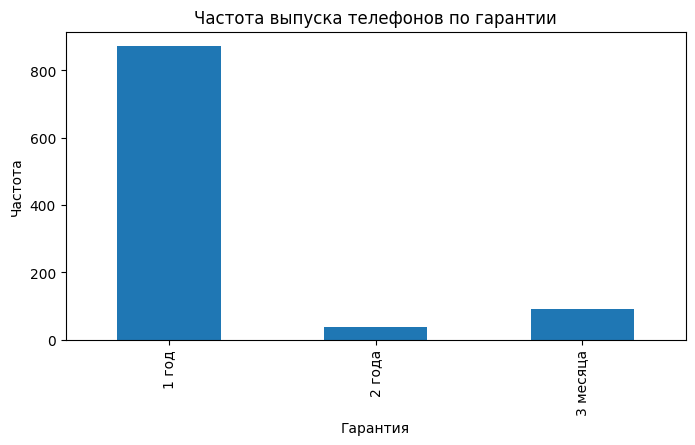

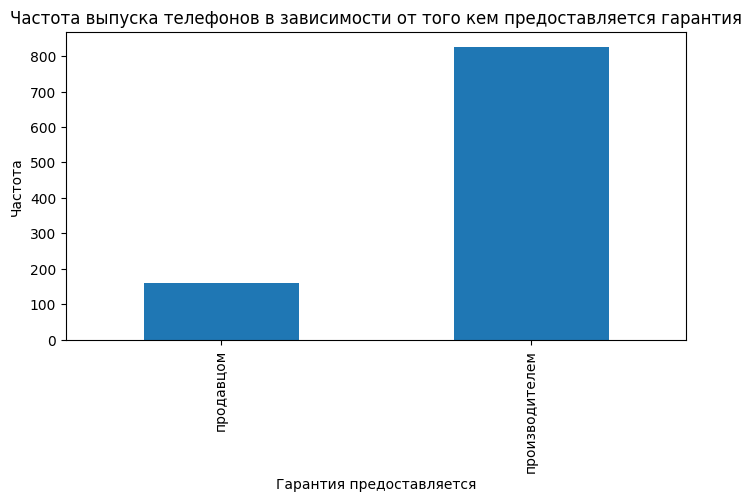

In [8]:
plt.figure(figsize=(8, 4))
sns.lineplot(full_df, x = 'Гарантия', y='salePrice', alpha=0.5)
plt.xlabel('Гарантия')
plt.ylabel('Цена телефона')
plt.title('Зависимость цены телефона от гарантии')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='Гарантия предоставляется', y='salePrice', data=full_df)
plt.xlabel('Гарантия предоставляется')
plt.ylabel('Цена телефона')
plt.title('Ящик с усами: цена телефонов в зависимости от того кем предоставляется гарантия')
plt.xticks(rotation=90)
plt.show()

year_counts = full_df['Гарантия'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
year_counts.plot(kind='bar')
plt.xlabel('Гарантия')
plt.ylabel('Частота')
plt.title('Частота выпуска телефонов по гарантии')
plt.show()

year_counts = full_df['Гарантия предоставляется'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
year_counts.plot(kind='bar')
plt.xlabel('Гарантия предоставляется')
plt.ylabel('Частота')
plt.title('Частота выпуска телефонов в зависимости от того кем предоставляется гарантия')
plt.show()

Так как гарантия есть в любом случае, но график показывает, что при гарантии на 2 года цена якобы ниже(так как очень мало наблюдений), то я бы не рассматривала эту переменную и оставила бы только то кем предоставляется

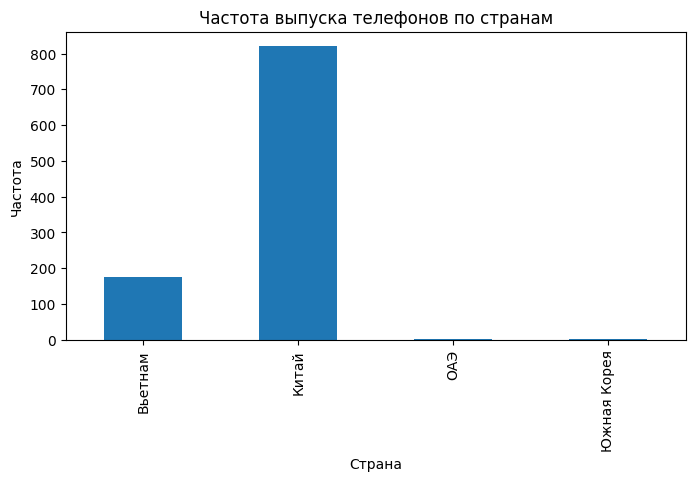

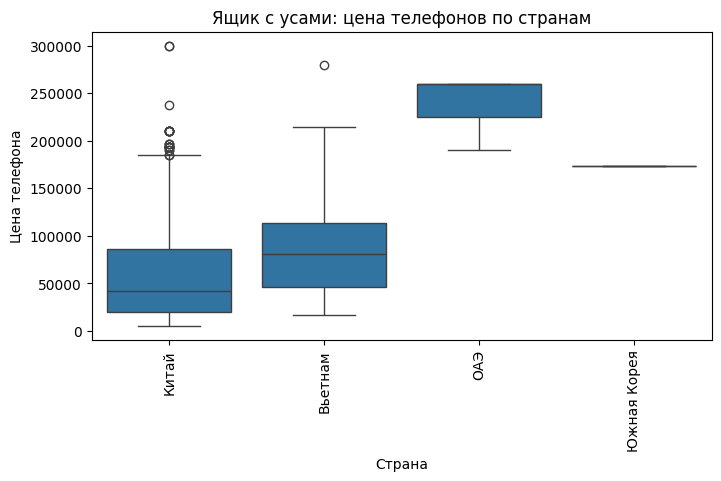

In [9]:
year_counts = full_df['Страна'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
year_counts.plot(kind='bar')
plt.xlabel('Страна')
plt.ylabel('Частота')
plt.title('Частота выпуска телефонов по странам')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='Страна', y='salePrice', data=full_df)
plt.xlabel('Страна')
plt.ylabel('Цена телефона')
plt.title('Ящик с усами: цена телефонов по странам')
plt.xticks(rotation=90)
plt.show()

In [10]:
full_df['Страна_Китай'] = full_df['Страна'].apply(lambda x: "Китай" if x == 'Китай' else "Не Китай")

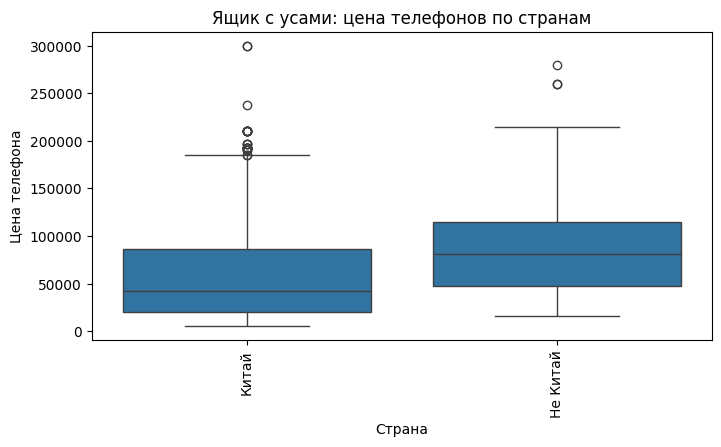

In [11]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Страна_Китай', y='salePrice', data=full_df)
plt.xlabel('Страна')
plt.ylabel('Цена телефона')
plt.title('Ящик с усами: цена телефонов по странам')
plt.xticks(rotation=90)
plt.show()

Т.к. ОАЭ и Южная Корея произвели очень мало телефонов, то я бы предложила сделать переменную "Произведено в Китае" вместо того чтобы рассматривать отдельно страны


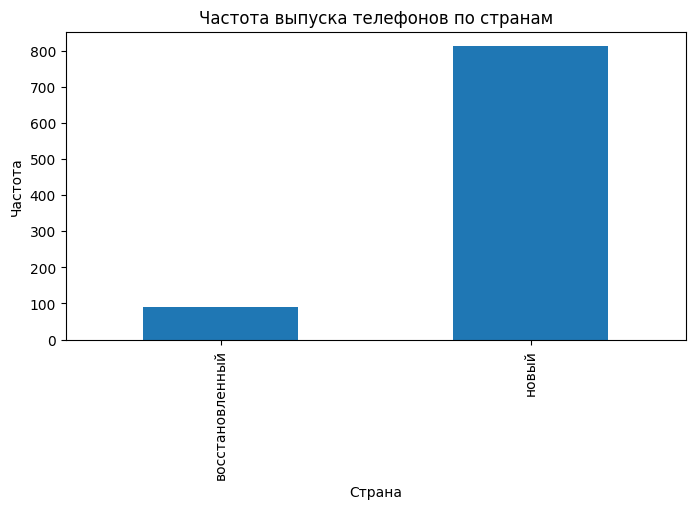

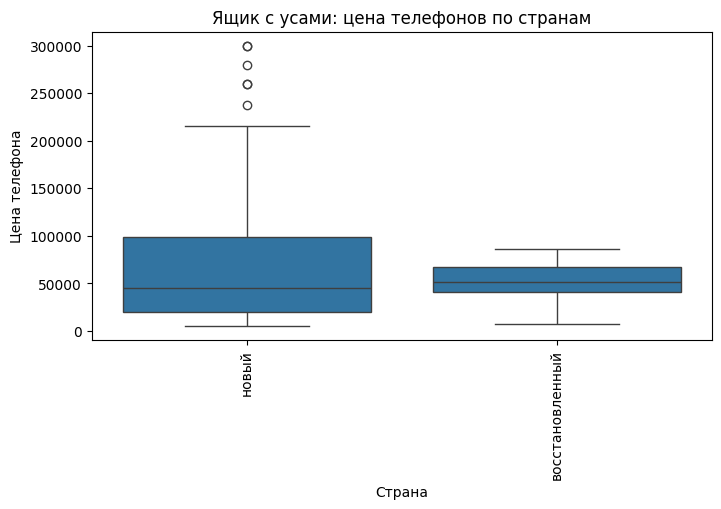

In [12]:
year_counts = full_df['Состояние'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
year_counts.plot(kind='bar')
plt.xlabel('Страна')
plt.ylabel('Частота')
plt.title('Частота выпуска телефонов по странам')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='Состояние', y='salePrice', data=full_df)
plt.xlabel('Страна')
plt.ylabel('Цена телефона')
plt.title('Ящик с усами: цена телефонов по странам')
plt.xticks(rotation=90)
plt.show()

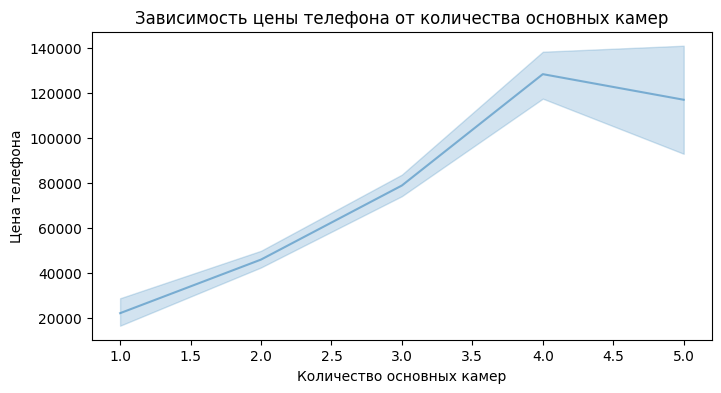

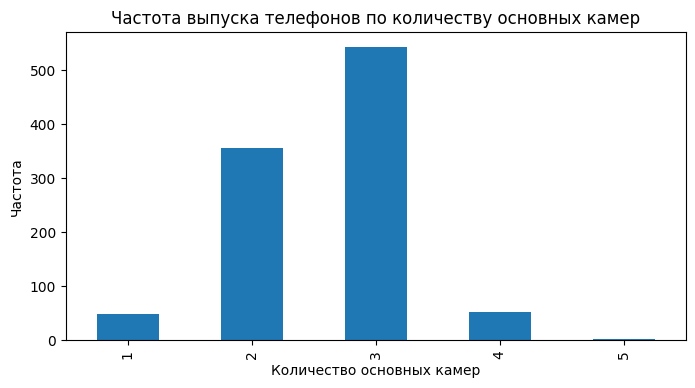

In [132]:
plt.figure(figsize=(8, 4))
sns.lineplot(full_df, x = 'Количество основных камер (шт)', y='salePrice', alpha=0.5)
plt.xlabel('Количество основных камер')
plt.ylabel('Цена телефона')
plt.title('Зависимость цены телефона от количества основных камер')
plt.show()

year_counts = full_df['Количество основных камер (шт)'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
year_counts.plot(kind='bar')
plt.xlabel('Количество основных камер')
plt.ylabel('Частота')
plt.title('Частота выпуска телефонов по количеству основных камер')
plt.show()


Т.к телефонов с 5 камерами слишком мало чтобы оценивать можно отнести к выбросам

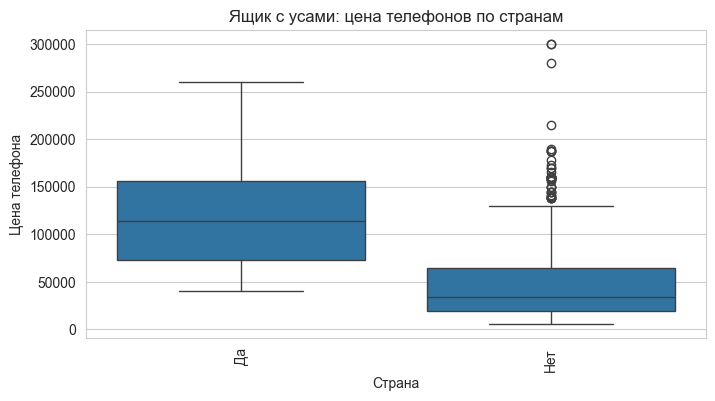

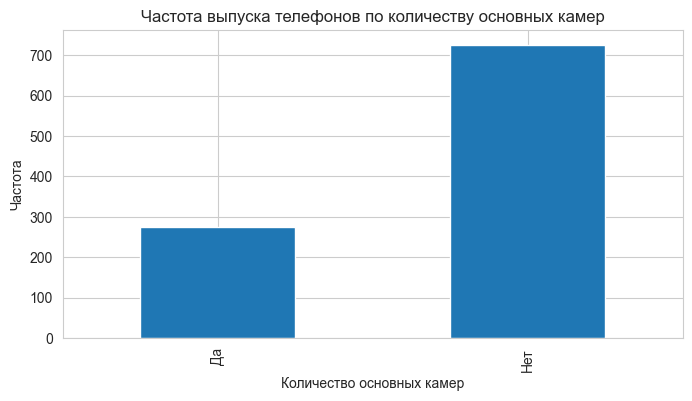

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Съемка видео в портретном режиме', y='salePrice', data=full_df)
plt.xlabel('Съемка видео в портретном режиме')
plt.ylabel('Цена телефона')
plt.title('Ящик с усами: цена телефонов по наличию съемки видео в портретном режиме')
plt.xticks(rotation=90)
plt.show()

year_counts = full_df['Съемка видео в портретном режиме'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
year_counts.plot(kind='bar')
plt.xlabel('Съемка видео в портретном режиме')
plt.ylabel('Частота')
plt.title('Частота выпуска телефонов по наличию съемки видео в портретном режиме')
plt.show()


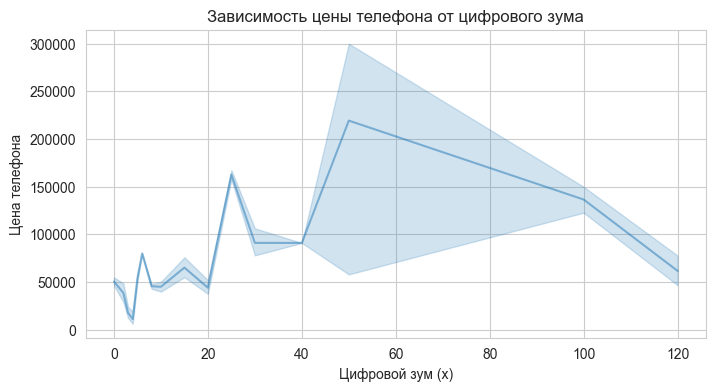

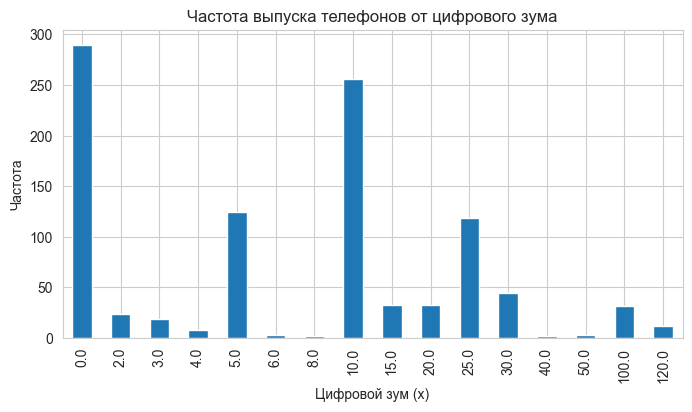

In [166]:
plt.figure(figsize=(8, 4))
sns.lineplot(full_df, x = 'Цифровой зум (x)', y='salePrice', alpha=0.5)
plt.xlabel('Цифровой зум (x)')
plt.ylabel('Цена телефона')
plt.title('Зависимость цены телефона от цифрового зума')
plt.show()

year_counts = full_df['Цифровой зум (x)'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
year_counts.plot(kind='bar')
plt.xlabel('Цифровой зум (x)')
plt.ylabel('Частота')
plt.title('Частота выпуска телефонов от цифрового зума')
plt.show()


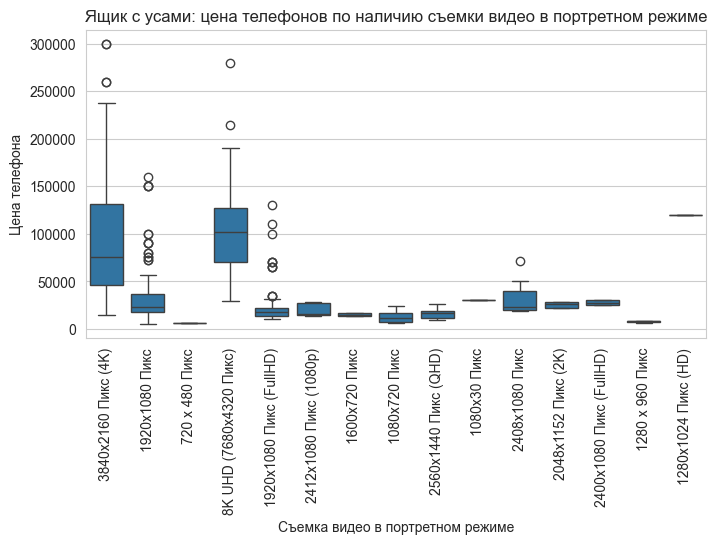

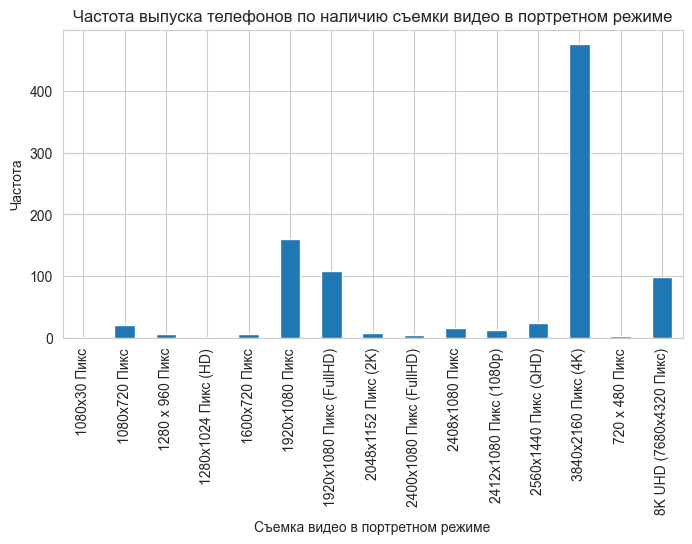

In [154]:

plt.figure(figsize=(8, 4))
sns.boxplot(x='Разрешение видеосъемки', y='salePrice', data=full_df)
plt.xlabel('Съемка видео в портретном режиме')
plt.ylabel('Цена телефона')
plt.title('Ящик с усами: цена телефонов по наличию съемки видео в портретном режиме')
plt.xticks(rotation=90)
plt.show()

year_counts = full_df['Разрешение видеосъемки'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
year_counts.plot(kind='bar')
plt.xlabel('Съемка видео в портретном режиме')
plt.ylabel('Частота')
plt.title('Частота выпуска телефонов по наличию съемки видео в портретном режиме')
plt.show()

Возможно стоит объединить малоиспользуемые разрешения

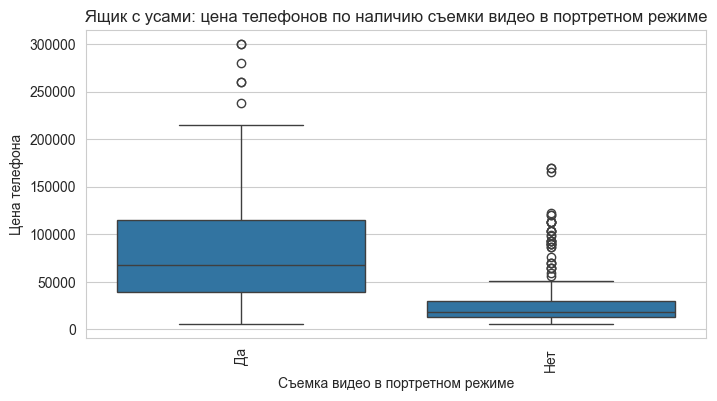

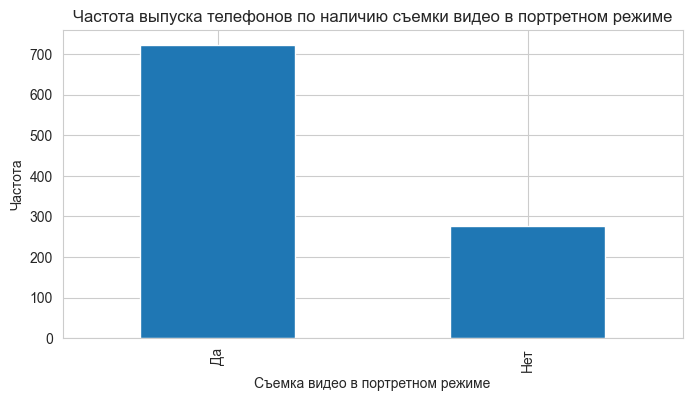

In [ ]:

plt.figure(figsize=(8, 4))
sns.boxplot(x='Оптическая стабилизация', y='salePrice', data=full_df)
plt.xlabel('Оптическая стабилизация')
plt.ylabel('Цена телефона')
plt.title('Ящик с усами: цена телефонов по оптической стабилизации')
plt.xticks(rotation=90)
plt.show()

year_counts = full_df['Оптическая стабилизация'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
year_counts.plot(kind='bar')
plt.xlabel('Оптическая стабилизация')
plt.ylabel('Частота')
plt.title('Частота выпуска телефонов по оптической стабилизации')
plt.show()

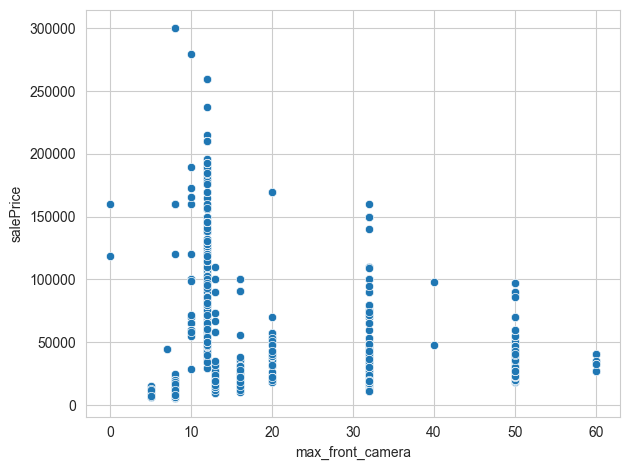

In [159]:
plt.plot(figsize=(12, 6))
# График 1: Макс. разрешение vs Цена
sns.scatterplot(
    x='max_front_camera', 
    y='salePrice', 
    data=full_df
)

plt.tight_layout()
plt.show()

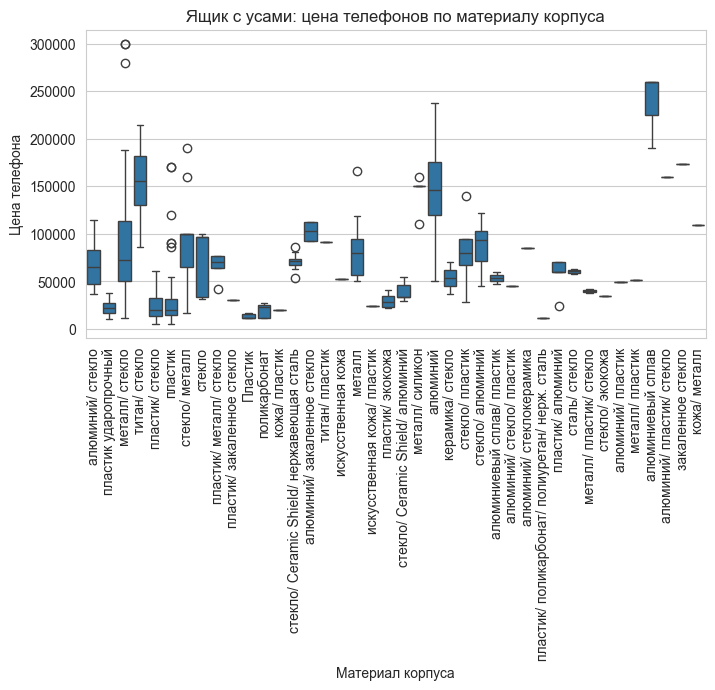

In [161]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Материал корпуса', y='salePrice', data=full_df)
plt.xlabel('Материал корпуса')
plt.ylabel('Цена телефона')
plt.title('Ящик с усами: цена телефонов по материалу корпуса')
plt.xticks(rotation=90)
plt.show()

можно убрать стекло, выделить основные материалы + будет перменная особенный материал и сделать бинарными

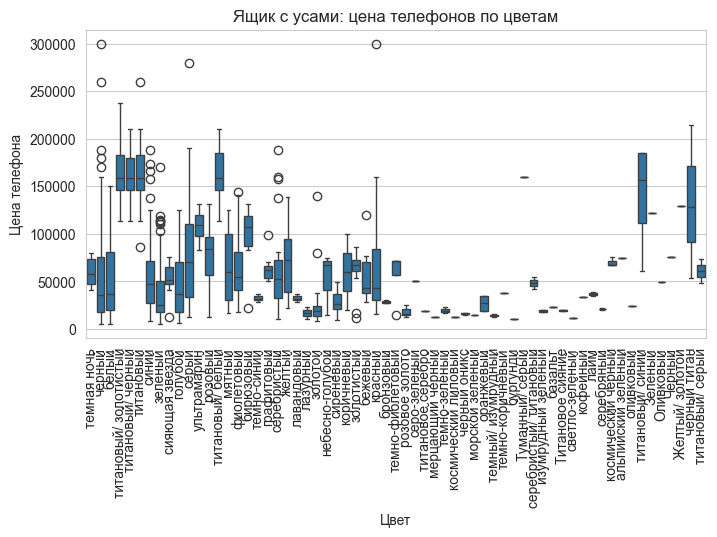

In [167]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Цвет', y='salePrice', data=full_df)
plt.xlabel('Цвет')
plt.ylabel('Цена телефона')
plt.title('Ящик с усами: цена телефонов по цветам')
plt.xticks(rotation=90)
plt.show()

Из вариантов только вручную если выделить основные цвета и их рассматривать 


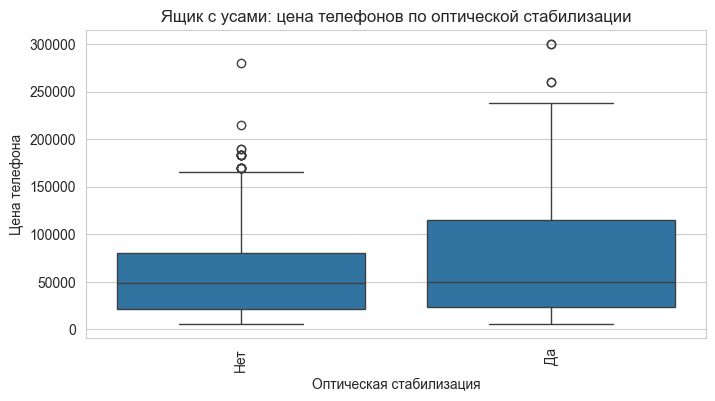

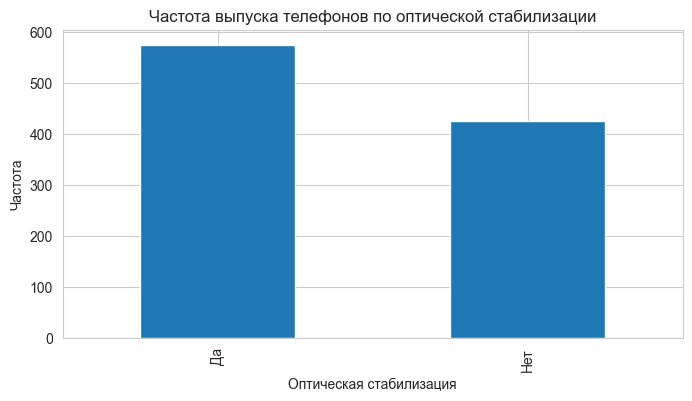

In [163]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Цифровая стабилизация', y='salePrice', data=full_df)
plt.xlabel('Оптическая стабилизация')
plt.ylabel('Цена телефона')
plt.title('Ящик с усами: цена телефонов по оптической стабилизации')
plt.xticks(rotation=90)
plt.show()

year_counts = full_df['Цифровая стабилизация'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
year_counts.plot(kind='bar')
plt.xlabel('Оптическая стабилизация')
plt.ylabel('Частота')
plt.title('Частота выпуска телефонов по оптической стабилизации')
plt.show()

Я бы не рассматривала

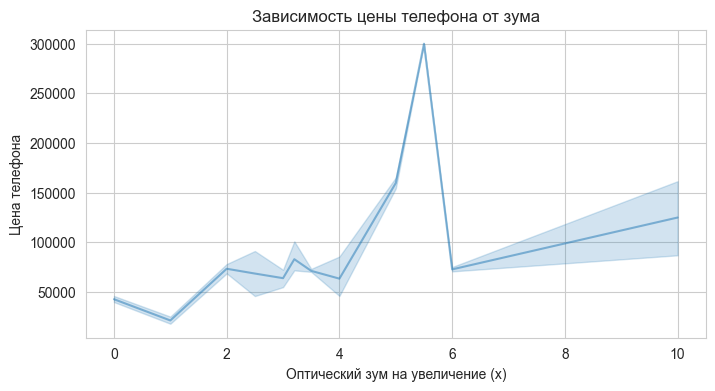

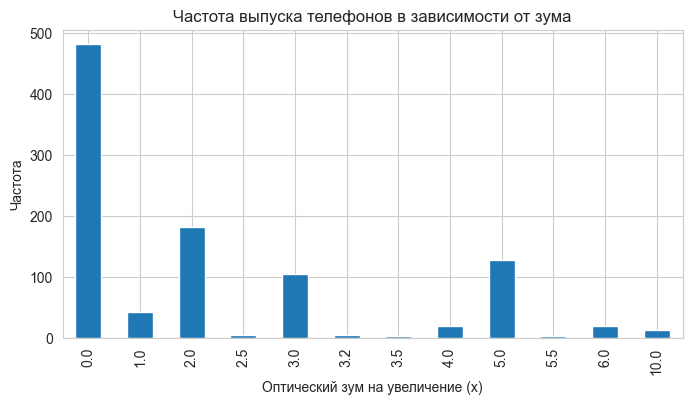

In [165]:
plt.figure(figsize=(8, 4))
sns.lineplot(full_df, x = 'Оптический зум на увеличение (x)', y='salePrice', alpha=0.5)
plt.xlabel('Оптический зум на увеличение (x)')
plt.ylabel('Цена телефона')
plt.title('Зависимость цены телефона от зума')
plt.show()

year_counts = full_df['Оптический зум на увеличение (x)'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
year_counts.plot(kind='bar')
plt.xlabel('Оптический зум на увеличение (x)')
plt.ylabel('Частота')
plt.title('Частота выпуска телефонов в зависимости от зума')
plt.show()

Нелинейная зависимость, может быть оставить бинарную переменную больше 6 и меньше

df[['brand', 'Гарантия предоставляется', 'Страна_Китай','Операционная система','Количество основных камер (шт)',
   'total_camera_mp','Съемка видео в портретном режиме','Фронтальная камера МПикс','Материал корпуса','Цвет', 'Цифровая стабилизация','Оптический зум на увеличение (x)']]